In [1]:
import pandas as pd
import numpy as np
import csv
from math import floor
from matplotlib import pyplot as plt
import matplotlib
from li_s_battery_init import inputs
from li_s_battery_init import cathode as cat
from li_s_battery_init import anode as an
from li_s_battery_post import tag_strings
import os
import sys
owd = os.getcwd()


Density for cascade
Using Bessler-Dennis
Inputs check
[-2.79078689]
[2.39119247 2.21930106 2.120115   1.91998095 1.89002821]
17582.20319724849
5.159278405977807
0.8524025079487235
External current = -3.2552662742304572
Initialization check


In [2]:
# Function definitions
def get_file_name(find_string, dir_path, **kwargs):
    flag = kwargs.get('flag', None)
    full_list = os.listdir(dir_path)
    if flag:
        file_name = [file for file in full_list if find_string in file]
    else:
        file_name = [file for file in full_list if find_string in file][0]
        
    return file_name

def df_name(file_name_list, file_number):
    file_name = file_name_list[file_number]
    df_name = file_name.split('_')
    return df_name[0]

def read_file(file_name_list):
    df_dict = {}
    for i in np.arange(0, len(file_name_list)):
        name = df_name(file_name_list, i)
        df_dict[name] = pd.read_csv(file_name_list[i])
    return df_dict

def sort_df(SV):
    Vcell = {}
    Capacity = {}
    C_k = {}
    keys = list(SV.keys())
    tags = tag_strings(SV['dch0.1C'])
    for i in np.arange(0, len(SV.keys())):
        offset = i*9
        Crate = keys[i]
        Vcell[Crate] = SV[Crate]['Phi_ed1']
        Capacity[Crate] = SV[Crate]['Time']
        C_k[Crate] = SV[Crate][tags['rho_el']]
    return Vcell, Capacity, C_k

In [3]:
#assary_files = get_file_name('.csv', 'Assary Data', flag=1)
#kuzmina_files = get_file_name('.csv', 'Kuzmina Data', flag=1)
cascade_files = get_file_name('.csv', 'Cascade Data', flag=1)
cascade_L_files = get_file_name('.csv', 'Lithiated Data', flag=1)
bessler_files = get_file_name('.csv', 'Bessler Data', flag=1)

In [4]:
#os.chdir(owd)
#os.chdir('Assary Data')
#assary_data = read_file(assary_files)
#os.chdir(owd)
#os.chdir('Kuzmina Data')
#kuzmina_data = read_file(kuzmina_files)
os.chdir(owd)
os.chdir('Cascade Data')
cascade_data = read_file(cascade_files)
os.chdir(owd)
os.chdir('Lithiated Data')
lithiated_data = read_file(cascade_L_files)
os.chdir(owd)
os.chdir('Bessler Data')
bessler_data = read_file(bessler_files)
os.chdir(owd)

In [5]:
#Vcell_assary, Cap_assary, C_k_assary = sort_df(assary_data)
#Vcell_kuzmina, Cap_kuzmina, C_k_kuzmina = sort_df(kuzmina_data)
Vcell_cascade, Cap_cascade, C_k_cascade = sort_df(cascade_data)
Vcell_Li, Cap_Li, C_k_Li = sort_df(lithiated_data)
Vcell_bessler, Cap_bessler, C_k_bessler = sort_df(bessler_data)

In [6]:
fs = 20
font = 'Times New Roman'
lw = 2.0
keys = ['dch0.1C', 'dch0.2C', 'dch0.3C', 'dch0.4C', 'dch0.5C', 'dch0.6C', 'dch0.7C',
        'dch0.8C', 'dch0.9C', 'dch1C', 'dch1.1C', 'dch1.2C', 'dch1.3C',
        'dch1.4C']
tags = tag_strings(cascade_data['dch0.1C'])
grad = np.linspace(0, 1, 6)
species_cmap = np.zeros((len(grad),4))
for i, val in enumerate(grad):
    species_cmap[i] = matplotlib.cm.plasma(val)
colormap = plt.cm.get_cmap('plasma')
print(species_cmap)

[[5.03830e-02 2.98030e-02 5.27975e-01 1.00000e+00]
 [4.17642e-01 5.64000e-04 6.58390e-01 1.00000e+00]
 [6.92840e-01 1.65141e-01 5.64522e-01 1.00000e+00]
 [8.81443e-01 3.92529e-01 3.83229e-01 1.00000e+00]
 [9.88260e-01 6.52325e-01 2.11364e-01 1.00000e+00]
 [9.40015e-01 9.75158e-01 1.31326e-01 1.00000e+00]]


## Section 1 plotting cell voltage at various C-rates 

dch0.1C
dch0.3C
dch0.5C
dch0.7C
dch0.9C
dch1.1C
dch1.3C


C:\Users\korff\anaconda3\envs\cantera\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


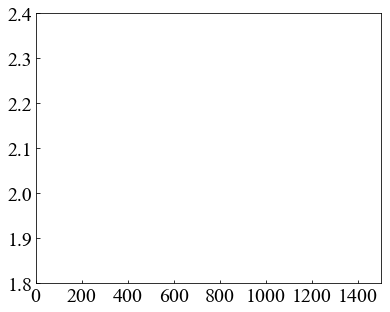

In [7]:
os.chdir(owd)
os.chdir('Figures/voltage')
for i in np.arange(0, len(keys), 2):
    fig = plt.figure(1)
    ax = fig.add_axes([0.2, 0.2, 0.6, 0.75])
    ax.tick_params(direction='in')
    fig.set_size_inches((8., 5.))
    
    for tick in ax.xaxis.get_major_ticks():
        tick.label1.set_fontsize(fs)
        tick.label1.set_fontname(font)
    for tick in ax.yaxis.get_major_ticks():
        tick.label1.set_fontsize(fs)
        tick.label1.set_fontname(font)
    print(keys[i])
    #p1, = plt.plot(Cap_assary[keys[i]], Vcell_assary[keys[i]], 'k-', linewidth=lw)
    #p2, = plt.plot(Cap_kuzmina[keys[i]], Vcell_kuzmina[keys[i]], 'r-', linewidth=lw)
    #p3, = plt.plot(Cap_cascade[keys[i]], Vcell_cascade[keys[i]], 'b-', linewidth=lw)
    
    plt.xlim((0, 1500))
    plt.ylim((1.8, 2.4))
    fig.savefig('Vcell' + keys[i] + '.png')
os.chdir(owd)

## Plotting polysulfide concentrations at 0.1C

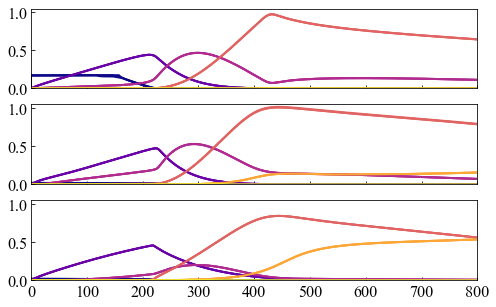

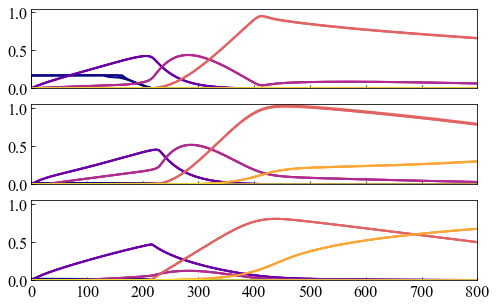

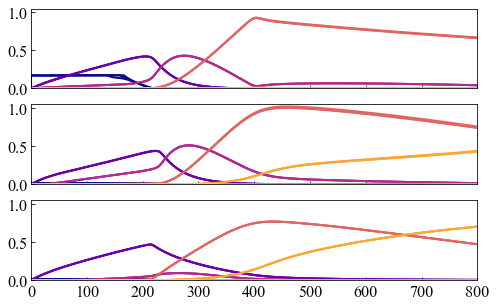

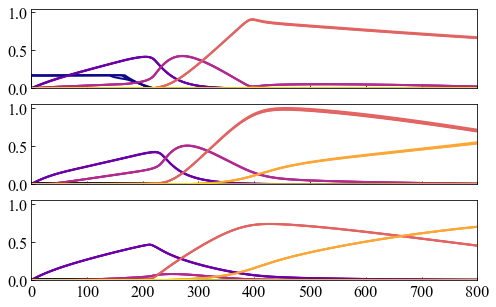

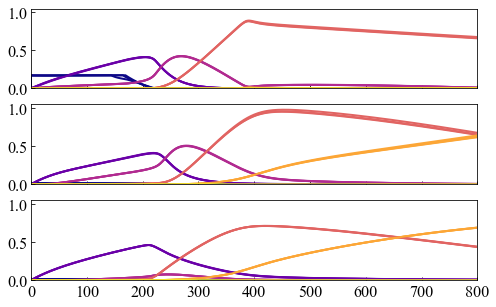

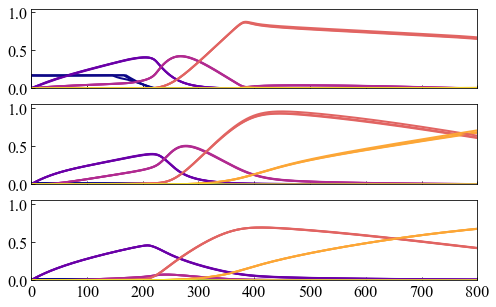

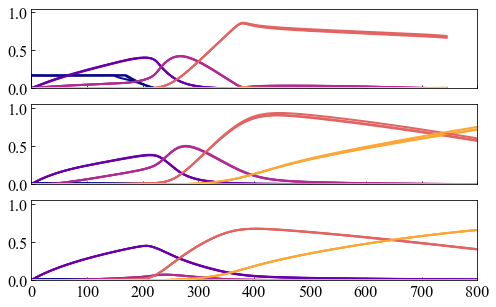

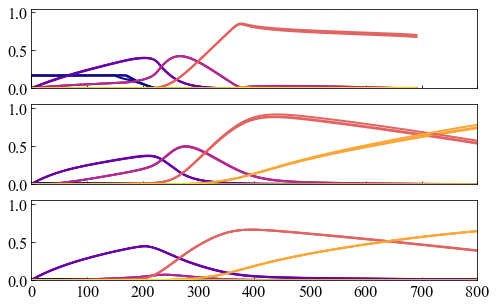

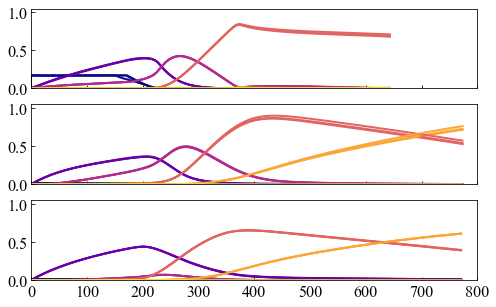

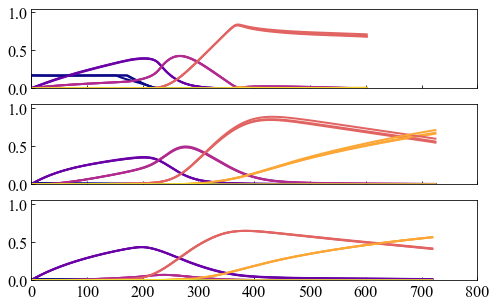

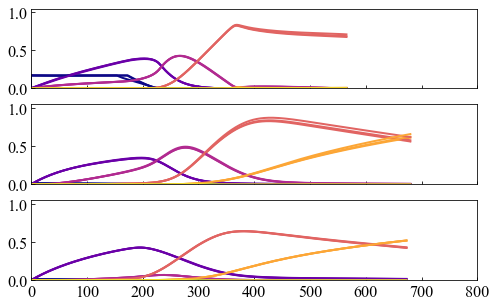

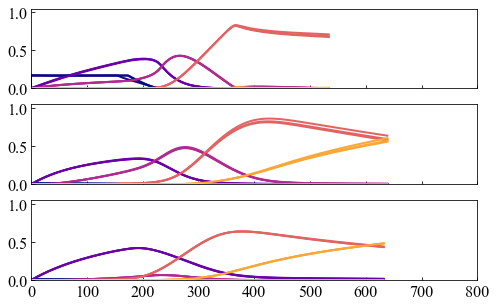

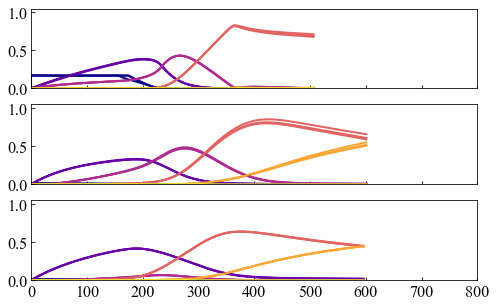

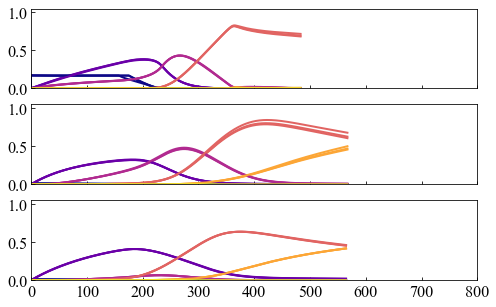

In [107]:
os.chdir(owd)
os.chdir('Figures/species concentrations')
for i in np.arange(0, len(keys)):
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, sharey=True, num=i)
    ax1.tick_params(direction='in')
    ax2.tick_params(direction='in')
    ax3.tick_params(direction='in')
    fig.set_size_inches((8., 5.))
    
    for tick in ax1.xaxis.get_major_ticks():
        tick.label1.set_fontsize(fs-4)
        tick.label1.set_fontname(font)
    for tick in ax1.yaxis.get_major_ticks():
        tick.label1.set_fontsize(fs-4)
        tick.label1.set_fontname(font)
        
    for tick in ax2.xaxis.get_major_ticks():
        tick.label1.set_fontsize(fs-4)
        tick.label1.set_fontname(font)
    for tick in ax2.yaxis.get_major_ticks():
        tick.label1.set_fontsize(fs-4)
        tick.label1.set_fontname(font)
        
    for tick in ax3.xaxis.get_major_ticks():
        tick.label1.set_fontsize(fs-4)
        tick.label1.set_fontname(font)
    for tick in ax3.yaxis.get_major_ticks():
        tick.label1.set_fontsize(fs-4)
        tick.label1.set_fontname(font)

    for j in np.arange(0, inputs.npoints_cathode):
        offset = j*6
        for k in np.arange(0, 6):
            ax1.plot(Cap_bessler[keys[i]], C_k_bessler[keys[i]].iloc[:, k+offset], 
                     linewidth=lw, color=species_cmap[k])
            ax2.plot(Cap_Li[keys[i]], C_k_Li[keys[i]].iloc[:, k+offset], 
                     linewidth=lw, color=species_cmap[k])
            ax3.plot(Cap_cascade[keys[i]], C_k_cascade[keys[i]].iloc[:, k+offset], 
                     linewidth=lw, color=species_cmap[k])
    plt.ylim((0, 1.05))
    plt.xlim((0, 800))
    fig.savefig('C_k_elyte' + keys[i] + '.png')
    #fig.legend()
os.chdir(owd)

## Plotting Ragone plots to show stability

In [98]:
Li2S8_max = 7
Li2S4_max = 2
#Li2S2_max = 0.00695
#Li2S_max = 0.0008

Li2S6_max = 6
#Li2S3_max = 0.5*(Li2S4_max + Li2S2_max)
i_ext_0 = -3.255
i_ext = [i_ext_0, i_ext_0*2, i_ext_0*3, i_ext_0*4, i_ext_0*5, i_ext_0*6, i_ext_0*7, 
         i_ext_0*8, i_ext_0*9, i_ext_0*10, i_ext_0*11, i_ext_0*12, i_ext_0*13,
         i_ext_0*14]
Power_cascade = np.zeros((len(keys)))
E_rec = np.zeros((len(keys)))
for i in np.arange(0, len(keys)):
    Vcell_cascadei = Vcell_cascade[keys[i]]
    Cap_cascadei = Cap_cascade[keys[i]]
    Vcell_cascade_avg = np.average(Vcell_cascadei)
    Power_cascade[i] = -Vcell_cascade_avg*i_ext[i]*inputs.A_cat/an.m_bat
    E_rec[i] = -Vcell_cascade_avg*Cap_cascadei.iloc[-1]*(cat.m_S_0 + cat.m_S_el)/an.m_bat
    
print(Power_cascade, -E_rec)

[ 33.09539191  65.15822233  96.80177191 129.16245739 160.61221082
 191.68233655 223.38213161 253.79326461 286.0970498  317.3445923
 346.95344069 377.62000202 407.07639    438.58558247] [278.35104231 254.59127867 233.6231836  216.32707975 199.13537952
 183.42422821 169.91432035 156.89755466 146.31315169 136.26310885
 126.72768391 118.74052788 111.43323658 105.62144097]


In [99]:
Max_conc = np.zeros((len(keys)))
for i in np.arange(0, len(keys)):
    #print(C_k_cascade[keys[i]])
    max1 = max(C_k_cascade[keys[i]]['rho_S2-(e)_cat1'])
    max2 = max(C_k_cascade[keys[i]]['rho_S2-(e)_cat2'])
    max3 = max(C_k_cascade[keys[i]]['rho_S2-(e)_cat3'])
    #max4 = max(C_k_cascade[keys[i]]['rho_S2-(e)_cat4'])
    #max5 = max(C_k_cascade[keys[i]]['rho_S2-(e)_cat5'])
    Max_conc[i] = max(max1, max2, max3)
print(Max_conc)

Max_conc_norm = Max_conc/max(Max_conc)  #Li2S4_max
print(Max_conc_norm)

plasma_custom = matplotlib.cm.plasma(Max_conc_norm)

[0.63108437 0.78329387 0.82251963 0.8201035  0.80027514 0.76306158
 0.71601904 0.66518157 0.61455777 0.56671628 0.52308397 0.48412337
 0.44955076 0.41896622]
[0.76725752 0.95231025 1.         0.99706253 0.97295567 0.9277123
 0.87051909 0.80871209 0.74716486 0.68900031 0.63595318 0.58858579
 0.54655322 0.50936926]


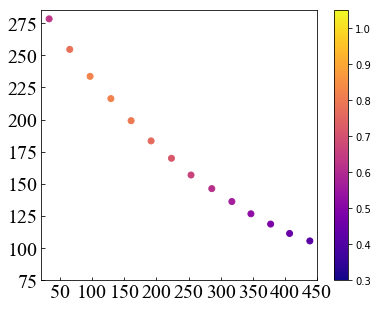

In [100]:
os.chdir(owd)
os.chdir('Figures/ragone plots')
fig = plt.figure(1)
ax = fig.add_axes([0.2, 0.2, 0.6, 0.75])
ax.tick_params(direction='in')
fig.set_size_inches((8., 5.))

for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(fs)
    tick.label1.set_fontname(font)
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(fs)
    tick.label1.set_fontname(font)

p1 = plt.scatter(Power_cascade, -E_rec, c=Max_conc, cmap='plasma', 
                 vmin=0.3, vmax=1+0.05)
plt.colorbar(p1)
plt.ylim((75, 285))
plt.xlim((20, 450))
fig.savefig('Ragone.png')
os.chdir(owd)

In [101]:
Power_Li = np.zeros((len(keys)))
E_rec_Li = np.zeros((len(keys)))
for i in np.arange(0, len(keys)):
    Vcell_Lii = Vcell_Li[keys[i]]
    Cap_Lii = Cap_Li[keys[i]]
    Vcell_Li_avg = np.average(Vcell_Lii)
    Power_Li[i] = -Vcell_Li_avg*i_ext[i]*inputs.A_cat/an.m_bat
    E_rec_Li[i] = -Vcell_Li_avg*Cap_Lii.iloc[-1]*(cat.m_S_0 + cat.m_S_el)/an.m_bat
    
print(Power_Li, -E_rec_Li)

[ 33.69678056  67.04850468 100.09289429 132.89088422 166.33957084
 198.48034329 230.45977351 262.73808868 296.30874497 327.17046921
 360.80093978 389.94326192 423.61992369 455.01659135] [275.63629579 252.83787339 232.88635945 215.47674151 201.08111864
 186.67544812 173.64871523 162.03113878 152.05259554 141.5817272
 133.15375017 123.91404012 116.9279671  110.05647563]


In [102]:
Max_conc = np.zeros((len(keys)))
for i in np.arange(0, len(keys)):
    #print(C_k_cascade[keys[i]])
    max1 = max(C_k_Li[keys[i]]['rho_Li2S2(e)_cat1'])
    max2 = max(C_k_Li[keys[i]]['rho_Li2S2(e)_cat2'])
    max3 = max(C_k_Li[keys[i]]['rho_Li2S2(e)_cat3'])
    #max4 = max(C_k_cascade[keys[i]]['rho_S2-(e)_cat4'])
    #max5 = max(C_k_cascade[keys[i]]['rho_S2-(e)_cat5'])
    Max_conc[i] = max(max1, max2, max3)
print(Max_conc)

Max_conc_norm = Max_conc/max(Max_conc)  #Li2S4_max
print(Max_conc_norm)

plasma_custom = matplotlib.cm.plasma(Max_conc_norm)

[0.46425158 0.62495929 0.73592788 0.81083532 0.85144819 0.8605555
 0.84426588 0.81003817 0.7647648  0.71376894 0.66050477 0.60675524
 0.55332475 0.50092983]
[0.53947895 0.72622775 0.8551777  0.94222315 0.98941694 1.
 0.9810708  0.94129683 0.88868736 0.82942813 0.76753303 0.70507392
 0.64298555 0.58210055]


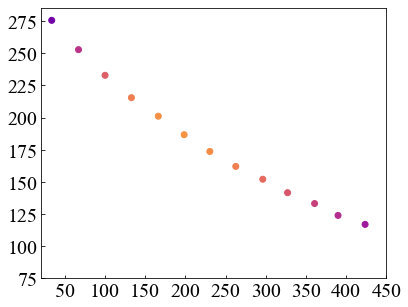

In [103]:
os.chdir(owd)
os.chdir('Figures/ragone plots')
fig = plt.figure(1)
ax = fig.add_axes([0.2, 0.2, 0.6, 0.75])
ax.tick_params(direction='in')
fig.set_size_inches((8., 5.))

for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(fs)
    tick.label1.set_fontname(font)
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(fs)
    tick.label1.set_fontname(font)

p1 = plt.scatter(Power_Li, -E_rec_Li, c=Max_conc, cmap='plasma', 
                 vmin=0.3, vmax=1+0.05)
#plt.colorbar(p1)
plt.ylim((75, 285))
plt.xlim((20, 450))
fig.savefig('Ragone_Li.png')
os.chdir(owd)

In [108]:
Power_bessler = np.zeros((len(keys)))
E_rec_bessler = np.zeros((len(keys)))
for i in np.arange(0, len(keys)):
    Vcell_bessleri = Vcell_bessler[keys[i]]
    Cap_bessleri = Cap_bessler[keys[i]]
    Vcell_bessler_avg = np.average(Vcell_bessleri)
    Power_bessler[i] = -Vcell_bessler_avg*i_ext[i]*inputs.A_cat/an.m_bat
    E_rec_bessler[i] = -Vcell_bessler_avg*Cap_bessleri.iloc[-1]*(cat.m_S_0 + cat.m_S_el)/an.m_bat
    
print(Power_bessler, -E_rec_bessler)

[ 33.67888295  65.75788857  97.35979029 129.09025601 159.88652463
 190.80507877 221.20347034 253.00754494 282.27163246 313.29566883
 344.99432319 373.1627523  402.74005577 435.08821185] [266.36504811 231.49011658 205.75668374 185.51644218 167.75717287
 153.19131934 140.5321165  130.4421571  120.48395307 112.57056691
 105.87694967  99.10825865  93.6928759   89.65831362]


In [109]:
Max_conc = np.zeros((len(keys)))
for i in np.arange(0, len(keys)):
    #print(C_k_cascade[keys[i]])
    max1 = max(C_k_bessler[keys[i]]['rho_S2-(e)_cat1'])
    max2 = max(C_k_bessler[keys[i]]['rho_S2-(e)_cat2'])
    max3 = max(C_k_bessler[keys[i]]['rho_S2-(e)_cat3'])
    #max4 = max(C_k_cascade[keys[i]]['rho_S2-(e)_cat4'])
    #max5 = max(C_k_cascade[keys[i]]['rho_S2-(e)_cat5'])
    Max_conc[i] = max(max1, max2, max3)
print(Max_conc)

Max_conc_norm = Max_conc/max(Max_conc)  #Li2S4_max
print(Max_conc_norm)

plasma_custom = matplotlib.cm.plasma(Max_conc_norm)

[0.00557916 0.00906902 0.01165217 0.01360642 0.01513481 0.01633953
 0.01726685 0.01794266 0.01838889 0.01863076 0.01869237 0.01860237
 0.01838105 0.01804754]
[0.2984724  0.4851721  0.62336528 0.72791328 0.80967879 0.87412819
 0.92373779 0.95989206 0.98376482 0.99670413 1.         0.99518536
 0.98334515 0.96550342]


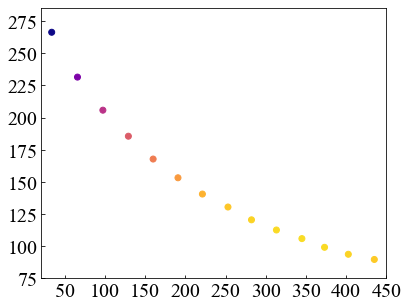

In [110]:
os.chdir(owd)
os.chdir('Figures/ragone plots')
fig = plt.figure(1)
ax = fig.add_axes([0.2, 0.2, 0.6, 0.75])
ax.tick_params(direction='in')
fig.set_size_inches((8., 5.))

for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(fs)
    tick.label1.set_fontname(font)
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(fs)
    tick.label1.set_fontname(font)

p1 = plt.scatter(Power_bessler, -E_rec_bessler, c=Max_conc_norm, cmap='plasma', 
                 vmin=0.3, vmax=1+0.05)
#plt.colorbar(p1)
plt.ylim((75, 285))
plt.xlim((20, 450))
fig.savefig('Ragone_bessler.png')
os.chdir(owd)

## Plotting mean polysulfide concentrations (order >=4)

In [ ]:
def plot_meanPS(SV_df, tags, cycle):

#    C_k = SV_df[tags['rho_el'][cathode.i_S8:-2]].copy()
    meanPS = np.zeros([len(SV_df.index), inputs.npoints_cathode])
    for i in np.arange(inputs.npoints_cathode):
        for j in np.arange(len(SV_df.index)):
            offset = i*10
            C_k = SV_df[tags['rho_el'][5+offset:offset+8]].copy()
            meanPS[j, i] = sum(cat.n_S_atoms[5:-2]*C_k.iloc[j, :])/sum(cat.S_atoms_bool[5:-2]*C_k.iloc[j, :])
          
    "Set up your figure"
    fig = plt.figure(2)
    ax = fig.add_axes([0.2,0.2,0.6,0.75])
    fig.set_size_inches((8.,5.0))
    
    "Formatting for the figure:"
    fs = 20     #font size for plots
    lw = 2.0    #line width for plots
#    font = plt.matplotlib.font_manager.FontProperties(family='Times New Roman',size=fs-1)
    
    for tick in ax.xaxis.get_major_ticks():
        tick.label1.set_fontsize(fs)
        tick.label1.set_fontname('Times New Roman')
    for tick in ax.yaxis.get_major_ticks():
        tick.label1.set_fontsize(fs)
        tick.label1.set_fontname('Times New Roman')    
    
    for i in np.arange(inputs.npoints_cathode):
        p1, = plt.plot(SV_df.loc[:, 'Time'], meanPS[:, i], '-', linewidth=lw)
        plt.xlim((0, 1770))
        plt.xticks([0, 200, 400, 600, 800, 1000, 1200, 1400, 1600])
        plt.yticks([2, 3, 4, 5, 6, 7, 8])
        plt.ylabel('Cell Voltage [V]', fontstyle='normal', fontname='Times new Roman', fontsize=fs+2, labelpad=5.0)
        plt.xlabel(r'Capacity $[\mathrm{Ah} \hspace{0.5} \mathrm{kg}^{-1}_{\mathrm{sulfur}}]$', fontstyle='normal', fontname='Times new Roman', fontsize=fs+2, labelpad=5.0)
        
    return